In [83]:
%pylab inline
import glob
import os
import pandas as pd

from riboraptor.helpers import path_leaf

from scipy import signal
def _shift_bit_length(x):
    """Shift bit"""
    return 1 << (x - 1).bit_length()


def _padwithzeros(vector, pad_width, iaxis, kwargs):
    """Pad with zeros"""
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

def coherence(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    next_pow2_length = _shift_bit_length(length)
    values = np.lib.pad(values,
                        (0, next_pow2_length - len(values) % next_pow2_length),
                        _padwithzeros)
    mean_centered_values = values - np.nanmean(values)
    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    uniform_signal = [0.7, 0.2, 0.1] * (next_pow2_length // 3)
    uniform_signal = np.lib.pad(
        uniform_signal,
        (0, next_pow2_length - len(uniform_signal) % next_pow2_length),
        _padwithzeros)

    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = uniform_signal / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(values, uniform_signal, nperseg=30, noverlap=27)
    return f, Cxy, values, uniform_signal 


def coherence2(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    uniform_signal = [0.7, 0.2, 0.1] * (length // 3)
    mean_centered_values = values - np.nanmean(values)
    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    
    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = mean_centered_values / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(normalized_values, uniform_signal, nperseg=30, noverlap=27)
    return f, Cxy, values, uniform_signal 


re_ribo_analysis_dir = '/staging/as/skchoudh/re-ribo-analysis/'
assemblies = os.listdir(re_ribo_analysis_dir)

assembly = 'hg38'



Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [97]:
metagene_values = {}
directory = os.path.join(re_ribo_analysis_dir, assembly)
for srp in os.listdir(directory):
    print(srp)
    metagene_dir = os.path.join(directory, srp, 'metagene_coverages')
    for f in glob.glob('{}/*.tsv'.format(metagene_dir)):
        df = pd.read_table(f)
        values = pd.Series(df['count'].tolist(), index=df['position'].tolist())
        metagene_values[path_leaf(f).split('.')[0]] = values

    



SRP014542
SRP098789
SRP031501
SRP049168
SRP017942
SRP002605
SRP038695
SRP045214
SRP010679
SRP042937
SRP092068
SRP055009
SRP109126
SRP010679_fixed_adapters


In [ ]:
1313622 2316602 3437005 4988696 5577283 6100541 7659006 8549000 9635155 0754902

0.4554196413217396


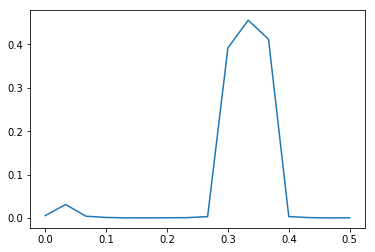

In [84]:
values = metagene_values['SRX118292']
f, Cxy, values, uniform_signal  = coherence(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

0.6657912755923593


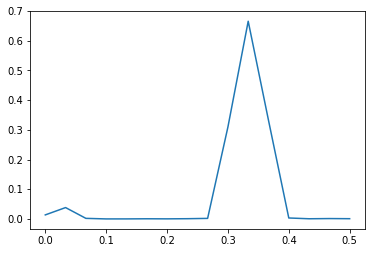

In [95]:
values = metagene_values['SRX118291']
f, Cxy, values2, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

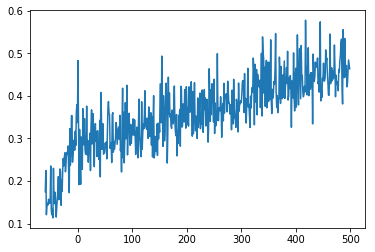

In [96]:
plt.plot(values)

0.619627501964472


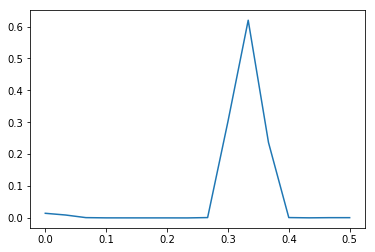

In [64]:
values = metagene_values['SRX118289']
f, Cxy, values, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

0.6861293476433842


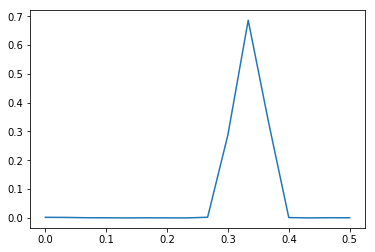

In [69]:
values = metagene_values['SRX118285']
f, Cxy, values, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [55]:
np.argwhere(f==0.33333333)

array([], shape=(0, 1), dtype=int64)

In [62]:
Cxy[np.argwhere(np.isclose(f, 0.33333333))[0]]

array([0.24700707])

In [50]:
Cxy[np.where(f==0.33333333)]

array([], dtype=float64)

0.5152502422425482


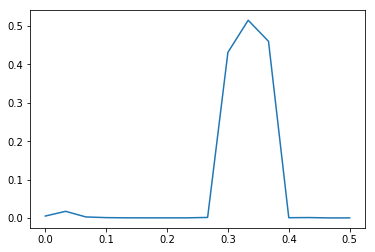

In [45]:
f, Cxy, values, uniform_signal  = coherence(metagene_values['SRX021972'][np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

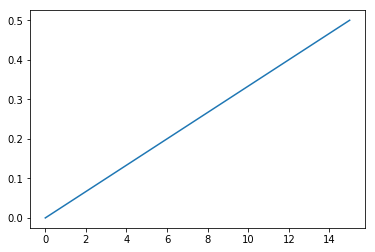

In [36]:
plt.plot(f)

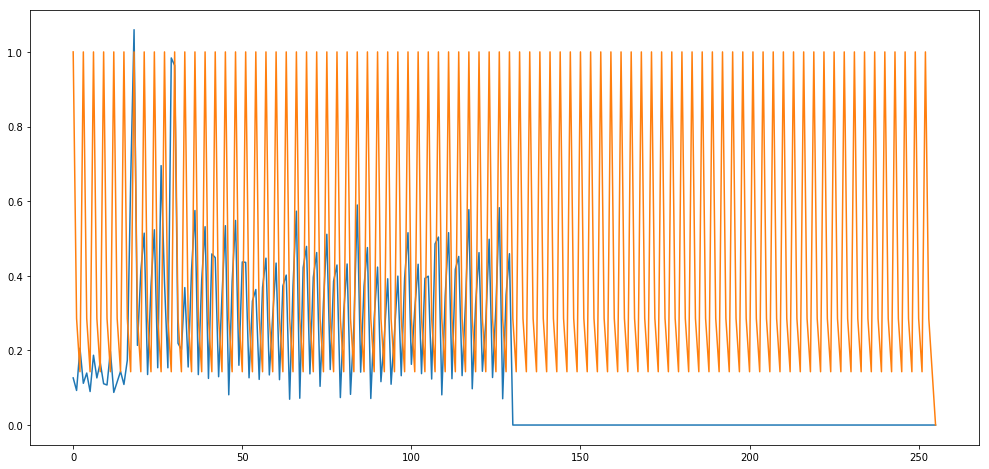

In [37]:
fig, ax = plt.subplots(figsize=(17,8))
ax.plot(values)
ax.plot(uniform_signal)


Text(0,0.5,'Coherence')

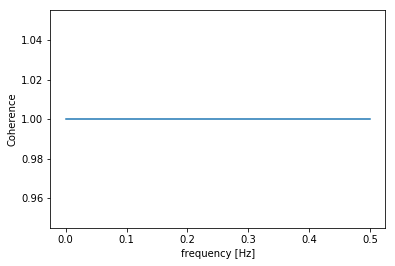

In [25]:
plt.plot(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')


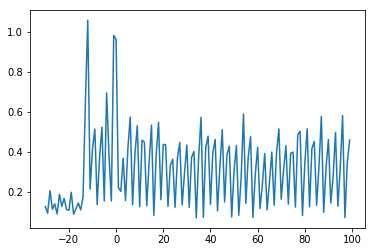

In [27]:
values = metagene_values['SRX021972'][np.arange(-30,100)]
plt.plot(values.index, values.values)

In [ ]:
1598692 2227797 3414565 4245586 5446123 6834077 7124692 8144675 9180651 0666347

In [ ]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)